# Retina tuning curves

author: laquitainesteeve@gmail.com based on codes from Carlo Paris

## Setup 


activate fisher_info_limits2

```python
python -m ipykernel install --user --name fisher_info_limits2 --display-name "fisher_info_limits2"
```

In [1]:
# import packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle5 as pickle
from scipy.stats import spearmanr, wilcoxon
from matplotlib.gridspec import GridSpec as GS
import math

# setup project path
proj_path = '/home/steeve/steeve/idv/code/fisher-info-limits'
os.chdir(proj_path)

# import custom package
import ssiProjectModule as ssiMod

# setup tuning curves parameters
sample_size = 500
theta_step = 2

# setup data paths
dat_dir_in = os.path.join(proj_path, 'data/decoding_analysis/')
data_dir = 'data/bayer_decoding_error/'+f'Bayes_Dec_Errs_{sample_size}reps_thetastep{theta_step}'+'.npz'
title = f'Stretch_BioQuads_multiplied_w_mean_g__theta_step={theta_step}_original_g_20240509_AREA.pkl'

# setup indices of examples of retina tuning curves quads
chosen_quads = np.array([201, 125, 104, 491])

# setup plot parameters
labelsize = 25
legend_fontsize = 15
text_size = 30
tick_labelsize = 20
letter_size=40
plt.rcParams['xtick.labelsize']=tick_labelsize
plt.rcParams['ytick.labelsize']=tick_labelsize
mpl.rcParams['axes.spines.right']=False

## Neural encoder

In [ ]:
%%time 

# load tuning curves data
with open(dat_dir_in + title, 'rb') as rick:
    data_dict = pickle.load(rick)
bio_idx = np.where(data_dict['all_multipliers']==1.)[0][0]

# setup stimulus direction space
stim = np.arange(0,360,theta_step)

CPU times: user 89 µs, sys: 89 ms, total: 89.1 ms
Wall time: 88.6 ms


CPU times: user 25.3 ms, sys: 3.97 ms, total: 29.3 ms
Wall time: 28.8 ms


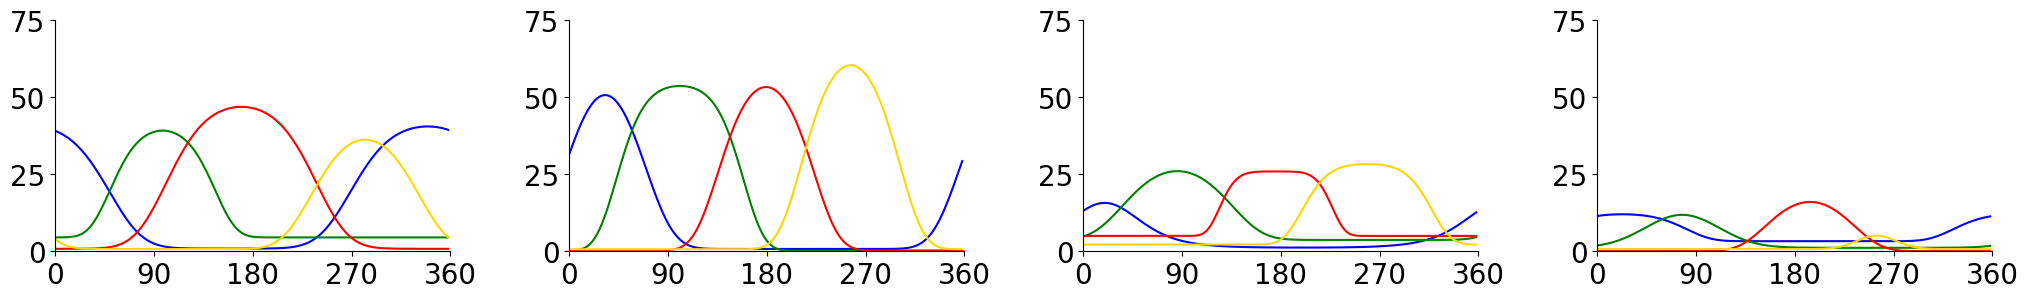

In [ ]:
%%time 

# get four examples of tuning curves quad of shape (n_neurons, n_directions)
tuning_curve_data_1 = data_dict['all_quad_tc'][chosen_quads[0], bio_idx]
tuning_curve_data_2 = data_dict['all_quad_tc'][chosen_quads[1], bio_idx]
tuning_curve_data_3 = data_dict['all_quad_tc'][chosen_quads[2], bio_idx]
tuning_curve_data_4 = data_dict['all_quad_tc'][chosen_quads[3], bio_idx]

# bundle tuning curves in a list
all_tuning_curves = [tuning_curve_data_1, tuning_curve_data_2, tuning_curve_data_3, tuning_curve_data_4]

# setup plot
fig = plt.figure(figsize=(25,3))
gs = GS(1, 4, wspace=0.3, hspace=0.75)
colors = ['blue', 'green', 'red', 'gold']

# plot tuning curves
for i, quad in enumerate(all_tuning_curves):

    ax = fig.add_subplot(gs[0,i])
    for j, tuning_curve_data in enumerate(quad):
        ax.plot(stim, tuning_curve_data/1.6, color = colors[j])

    # formatting
    ax.set_xlim(0,360)
    ax.set_ylim(0,75)    
    ax.set_xticks(np.arange(0,361, 90))
    ax.set_yticks(np.arange(0,76, 25))